
Classification Report:
               precision    recall  f1-score   support

          no       0.57      0.44      0.50         9
         yes       0.62      0.73      0.67        11

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20



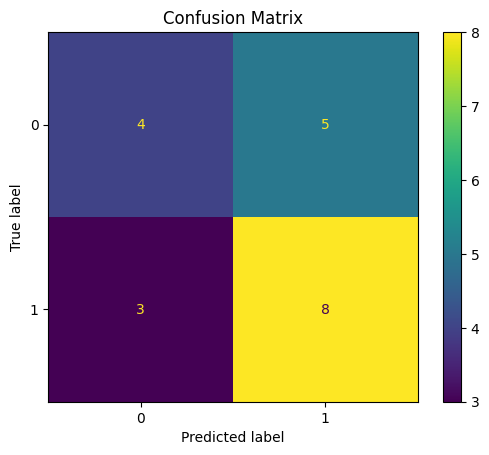

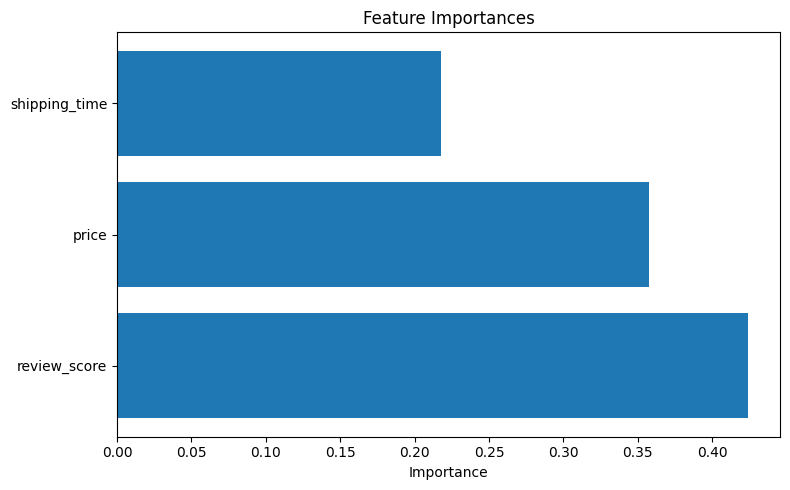

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
df = pd.read_csv("/content/product_return.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Rename for consistency
df.rename(columns={
    'purchase_amount': 'price',
    'days_to_delivery': 'shipping_time',
    'returned': 'return'
}, inplace=True)

# Fill missing values
df['review_score'] = df['review_score'].fillna(df['review_score'].median())
df['shipping_time'] = df['shipping_time'].fillna(df['shipping_time'].median())
df['price'] = df['price'].fillna(df['price'].median())

# Feature selection
features = ['review_score', 'price', 'shipping_time']
X = df[features]
y = df['return']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict & evaluate
y_pred = clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Feature importance plot
importances = clf.feature_importances_
plt.figure(figsize=(8, 5))
plt.title("Feature Importances")
plt.barh(features, importances)
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
